
car-price prediction project with a linear regression model

project steps:
1-Doing an initial exploratory data analysis with Jupyter notebooks
2-Setting up a validation framework
3-Implementing the linear regression model from scratch
4-Performing simple feature engineering for the model
5-Keeping the model under control with regularization
6-Using the model to predict car prices

# reading Date 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"F:\BRMAGA\maachine larning\ML\projects\car\data.csv")
print(len(df))
print(df.head(5))       

11914
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact    

In [3]:
print(df.columns,"\n")

df.info()

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11

In [4]:
for col in df.columns:
    print(col,": ", df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('*'*20,'\n')

Make :  48
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: Make, dtype: int64
******************** 

Model :  915
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: Model, dtype: int64
******************** 

Year :  28
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: Year, dtype: int64
******************** 

Engine Fuel Type :  10
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: Engine Fuel Type, dtype: int64
******************** 

Engine HP :  356
200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
Name: Engine HP, dtype: int64
******************** 

Engine Cylinders :  9
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
Name: Engine Cylinders, dtype:

# cleaning Data

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(5)
    

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(string_columns,'\n')

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    


['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'] 



In [7]:
df.rename( columns = {'msrp':'price'} , inplace = True )
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135


In [8]:
pd.options.display.float_format = '{:,.2f}'.format
print(df.describe(),'\n',"*"*20)
print(df.describe(include=['O']))

           year  engine_hp  engine_cylinders  number_of_doors  highway_mpg  \
count 11,914.00  11,845.00         11,884.00        11,908.00    11,914.00   
mean   2,010.38     249.39              5.63             3.44        26.64   
std        7.58     109.19              1.78             0.88         8.86   
min    1,990.00      55.00              0.00             2.00        12.00   
25%    2,007.00     170.00              4.00             2.00        22.00   
50%    2,015.00     227.00              6.00             4.00        26.00   
75%    2,016.00     300.00              6.00             4.00        30.00   
max    2,017.00   1,001.00             16.00             4.00       354.00   

       city_mpg  popularity        price  
count 11,914.00   11,914.00    11,914.00  
mean      19.73    1,554.91    40,594.74  
std        8.99    1,441.86    60,109.10  
min        7.00        2.00     2,000.00  
25%       16.00      549.00    21,000.00  
50%       18.00    1,385.00    29,995.0

# target varible analysis (price)

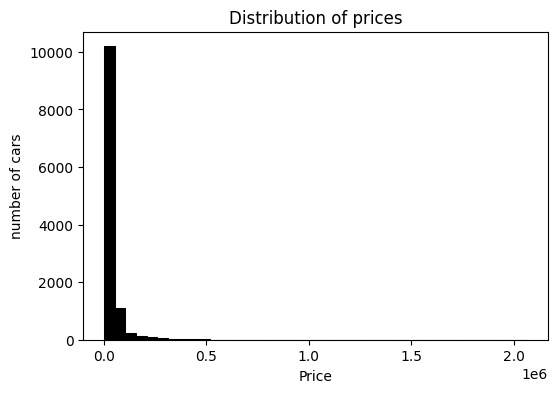

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=40, color='black', alpha=1)
plt.ylabel('number of cars')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

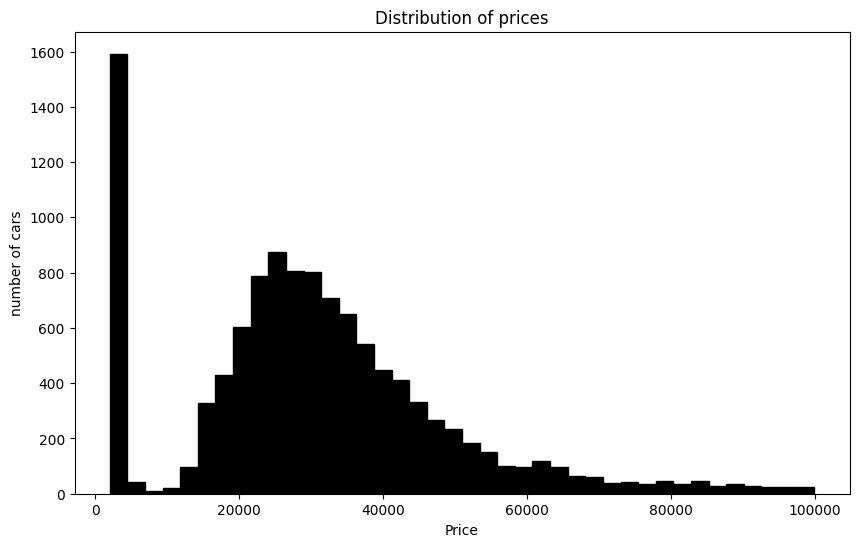

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot( df.price[ df.price < 100000 ], bins=40, color='black', alpha=1)
plt.ylabel('number of cars')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

# Log transformation
used to make data more amenable to analysis.
to prevent the long tail by making data more normal 

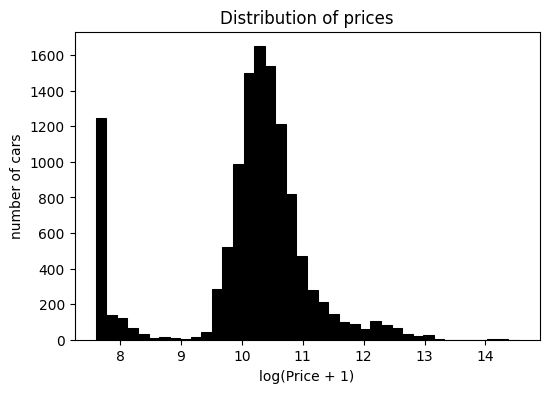

In [55]:


plt.figure(figsize=(6, 4)) # it calculates log(1 + x).
df['log_price'] = np.log1p(df.price)
sns.histplot(df.log_price, bins=40, color='black', alpha=1)
plt.ylabel('number of cars')
plt.xlabel('log(Price + 1)') # 'price+1' becuazse there is some cases in date with prices = 0 , log(0)  = infinity   
plt.title('Distribution of prices')

plt.show()

In [12]:
print(df .price.skew(),'\n')
print(df .log_price.skew())

11.771987129334972 

-0.9178678067039072


# check missing values

In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

# Some Questions
1: what is the average price of BMW cars  in the data set ?

In [14]:
df.groupby('make').mean()['price']['bmw']

C:\Users\Fannan\AppData\Local\Temp\ipykernel_9364\436252036.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('make').mean()['price']['bmw']


61546.76347305389


2: what is the average price of cars that made after 2015 in the data set ?

In [15]:
df[df['year'] > 2015]['price'] .mean()

45027.61359477124

# Validation framework
  split date to traning set a test set

In [16]:
np.random.seed(2) # to make sure that the results are reproducible 
# seed(2) to make sure that every time i will run the code it will give to me the same result 
n = len(df)

n_validation = int(0.2 * n) # 20% of data
n_test = int(0.2 * n)
n_Traning= int(0.6 * n)
print('Number of rows for Traning',n_Traning)
print('Number of rows for validation',n_validation)
print('Number of rows for test',n_test)

Number of rows for Traning 7148
Number of rows for validation 2382
Number of rows for test 2382


In [17]:
idx = np.arange(n) # array with indexes number 
print(idx,'\n')
np.random.shuffle(idx) # Randomly arrange data
print(idx)

[    0     1     2 ... 11911 11912 11913] 

[2735 6720 5878 ... 6637 2575 7336]


In [18]:
df_shuffled = df.iloc[idx]
print(df.index)
print(df_shuffled.index)

RangeIndex(start=0, stop=11914, step=1)
Int64Index([ 2735,  6720,  5878, 11190,  4554,  8001,  2882,   649,   616,
             4459,
            ...
             6751,   433,  4770, 11527,  1099,  2514, 11798,  6637,  2575,
             7336],
           dtype='int64', length=11914)


In [19]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.74
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650,10.61
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.50
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450,10.29
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500,10.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120,10.74
11910,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670,10.95
11911,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620,10.83
11912,acura,zdx,2013,premium_unleaded_(recommended),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920,10.84


In [20]:
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
2735,chevrolet,cobalt,2008,regular_unleaded,148.00,4.00,manual,front_wheel_drive,2.00,NaN,compact,coupe,33,24,1385,14410,9.58
6720,toyota,matrix,2012,regular_unleaded,132.00,4.00,automatic,front_wheel_drive,4.00,hatchback,compact,4dr_hatchback,32,25,2031,19685,9.89
5878,subaru,impreza,2016,regular_unleaded,148.00,4.00,automatic,all_wheel_drive,4.00,hatchback,compact,4dr_hatchback,37,28,640,19795,9.89
11190,volkswagen,vanagon,1991,regular_unleaded,90.00,4.00,manual,rear_wheel_drive,3.00,NaN,large,passenger_minivan,18,16,873,2000,7.60
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.00,8.00,automatic,four_wheel_drive,4.00,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,10.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.00,6.00,automatic,rear_wheel_drive,3.00,NaN,midsize,cargo_van,18,13,1385,2052,7.63
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.00,4.00,automatic,all_wheel_drive,4.00,"crossover,hybrid",compact,4dr_suv,33,29,640,25995,10.17
6637,dodge,magnum,2006,regular_unleaded,250.00,6.00,automatic,all_wheel_drive,4.00,NaN,large,wagon,22,15,1851,29100,10.28
2575,honda,civic,2016,regular_unleaded,174.00,4.00,automatic,front_wheel_drive,4.00,NaN,midsize,sedan,42,31,2202,22200,10.01


In [21]:
df_trian = df_shuffled.iloc[ : n_Traning ].copy()

df_validation = df_shuffled.iloc[ n_Traning :  n_Traning + n_validation ].copy()

df_test = df_shuffled.iloc[ n_Traning + n_validation : ].copy()

In [22]:
print(df_test.shape)
print(df_trian.shape)
print(df_validation.shape)

(2384, 17)
(7148, 17)
(2382, 17)


In [23]:
y_train = df_trian.log_price.values
y_val   = df_validation.log_price.values
y_test  = df_test.log_price.values

In [24]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.91328684,
       10.28247178, 10.45380308])

# Baseline solution
It will be a simple training for the model by using some of the features not all of them that may not give Best solution but only to start 


In [25]:
Base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # think about numerical only 
df[Base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.00,6.00,26,19,3916
1,300.00,6.00,28,19,3916
2,300.00,6.00,28,20,3916
3,230.00,6.00,28,18,3916
4,230.00,6.00,28,18,3916
...,...,...,...,...,...
11909,300.00,6.00,23,16,204
11910,300.00,6.00,23,16,204
11911,300.00,6.00,23,16,204
11912,300.00,6.00,23,16,204


In [26]:
df[Base].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

# Handel missing values
it will done by replace null values with the mean 

In [27]:
def prepare_X(df):
    df_num = df[Base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

# Linear regration

C:\Users\Fannan\AppData\Local\Temp\ipykernel_9364\4221508845.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _=sns.heatmap(df_trian.corr(), annot = True)


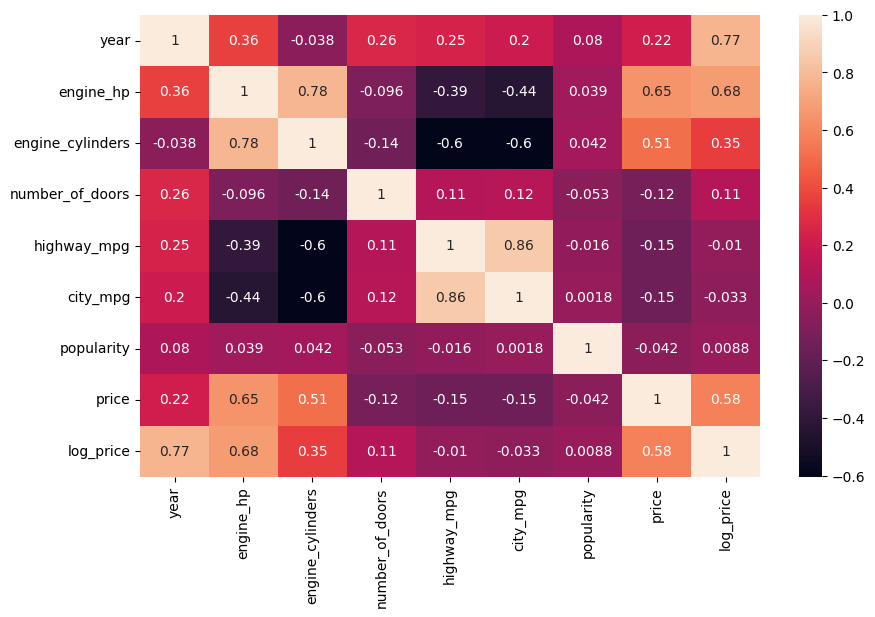

In [28]:
# cheack the linearity between log_price and other features
plt.figure(figsize=(10,6))
_=sns.heatmap(df_trian.corr(), annot = True)

In [29]:
def linear_regration(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred +=w[j]*xi[j] 

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [56]:
X_train = prepare_X(df_trian)
print(X_train.shape)
w_0,w = train_linear_regression(X_train,y_train)
y_pred = w_0 +X_train.dot(w)


(7148, 38)


Text(0.5, 1.0, 'prediction vs  actual distribution')

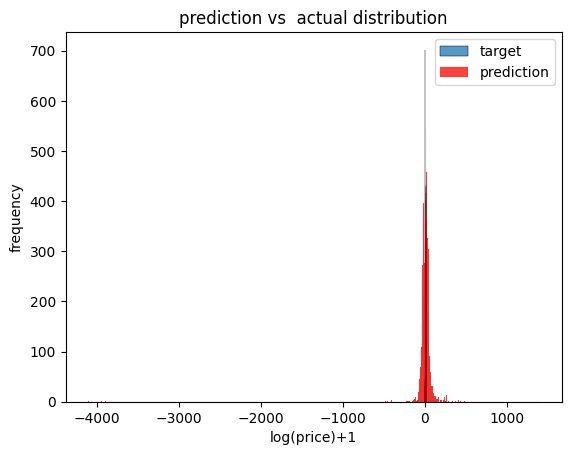

In [57]:
sns.histplot(y_train,label ="target")
sns.histplot(y_pred,label ="prediction",color = 'r')
plt.legend()
plt.ylabel('frequency')
plt.xlabel('log(price)+1')
plt.title('prediction vs  actual distribution')



In [58]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [59]:
rmse(y_train,y_pred)

128.88507237746458

In [60]:
X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

53.37468820868635

# Simple Feature Engineering
To improve our model, we can create other features and add them to the existing features. This process is called feature engineering.

In [61]:
sorted(df.year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [62]:
Base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [63]:
def prepare_X(df):
    df = df.copy()
    features = Base.copy()

    df['age'] = 2017 - df.year    # Because the dataset was created in 2017 (which we can verify by checking df_train.year.max())
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_trian)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print('Train RMSE: ', rmse(y_train, y_pred))

X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE: ', rmse(y_val, y_pred))

Train RMSE:  0.511783357099689
Validation RMSE:  0.5069147355656647


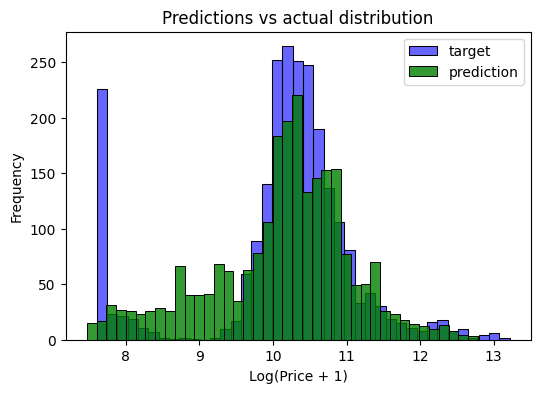

In [65]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='green', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# Handling Categorical Variables
to handel catagories data like column make and number of doors because it is derived to three  categories 2 or 3 or 4 doors   

In [66]:
# because make coolumn have a lot of values ,so i will choose most 5  makers
df['make'].value_counts().head(10)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: make, dtype: int64

In [67]:
def prepare_X(df):
    df = df.copy()
    features = Base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    # make col for each categore and put true if the number of doors  in each row  in main col 'number_of_doors'  == the v which refer to the categore 
    # like series    v=2    v=3    v=4
    #               False   true   false
    #               true   false   false
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int) # astype used for convert boolean to integer numbers
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [68]:
X_train = prepare_X(df_trian)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5011173271796298
validation: 0.49812258600744364


In [69]:
def prepare_X(df):
    df = df.copy()
    features = Base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [70]:
X_train = prepare_X(df_trian)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.47890349256044024
validation: 0.47470160238829767


In [71]:
def prepare_X(df):
    df = df.copy()
    features = Base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [72]:
X_train = prepare_X(df_trian)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.472319728538499
validation: 0.4653043797475715


In [73]:
def prepare_X(df):
    df = df.copy()
    features = Base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [74]:
X_train = prepare_X(df_trian)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 128.88507237746458
validation: 53.37468820868635


# Regularization

In [75]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [76]:
X_train = prepare_X(df_trian)
X_val = prepare_X(df_validation)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.45745189227348015
0.0001 0.4574521167146505
 0.001 0.45745324728237124
  0.01 0.45746459339659695
   0.1 0.4575804492140689
     1 0.45884562062873
     5 0.46442311529561225
    10 0.47069292510875055


In [77]:
X_train = prepare_X(df_trian)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.45746459339659695
test: 0.4545465641723348


# Using the model

In [78]:
i = 5
ad = df_test.iloc[i].to_dict()
ad

{'make': 'volvo',
 'model': '740',
 'year': 1992,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 114.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 26,
 'city_mpg': 18,
 'popularity': 870,
 'price': 2000,
 'log_price': 7.601402334583733}

In [79]:
X_test = prepare_X(pd.DataFrame([ad]))
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([2346.67462264])